In [1]:
import pysal as ps
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import inv

In [2]:
%matplotlib inline

# Interactive spatial autocorrelation

This notebook illustrates the concept of spatial autocorrelation using the new interactivity in IPython. The data generating process (DGP) considered here is the following:

1. $u = \lambda Wu + \epsilon$

1. $u - \lambda Wu = \epsilon$

1. $u (I - \lambda W) = \epsilon$

1. $u = (I - \lambda W)^{-1} \epsilon$

Where `u` is a vector spatially autocorrelated, `W` is a spatial weights matrix as you could created with `PySAL`, and $\epsilon$ is an i.i.d. random vector.

To implement the previous DGP, the simple method `draw_map` (actual code pasted at the bottom of the notebook, so make sure to run that cell beforehand) creates a random vector with degree of spatial autocorrelation $\lambda$ and allocates it to a lattice geography, where every pixel is assumed to be an area with a value. Right next to it, the function also displays the Moran's scatter plot. Both map and plot depend on the $\lambda$ parameter that controls the degree of spatial autocorrelation.

Here's a static version of the function:

/Users/serge/anaconda/envs/pysal110/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


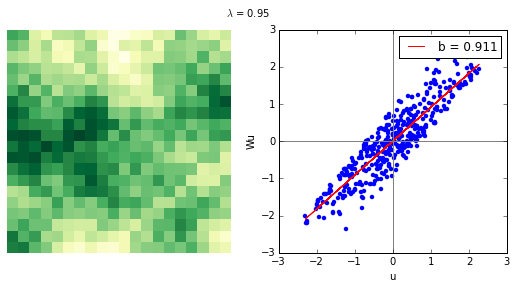

In [4]:
draw_map(0.95)

Now, we can make the $\lambda$ value change in an interactive way:

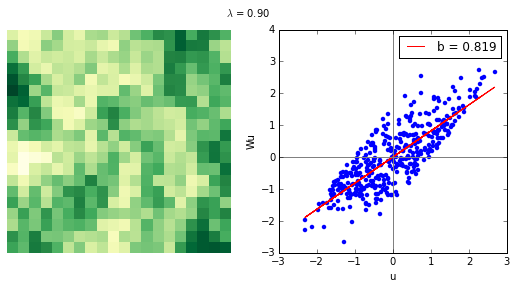

In [5]:
from ipywidgets import interact
interact(draw_map, lamb=(-0.9, 0.9))

# Actual plotting function

In [6]:
def draw_map(lamb):
    s = 20
    n = s**2
    w = ps.lat2W(s, s, rook=False)
    w.transform = 'R'
    e = np.random.random((n, 1))
    u = inv(np.eye(n) - lamb * w.full()[0])
    u = np.dot(u, e)
    ul = ps.lag_spatial(w, u)
    u = (u - u.mean()) / np.std(u)
    ul = (ul - ul.mean()) / np.std(ul)
    gu = u.reshape((s, s))
    # Figure
    f = plt.figure(figsize=(9, 4))
    ax1 = f.add_subplot(121)
    ax1.matshow(gu, cmap=plt.cm.YlGn)
    ax1.set_frame_on(False)
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)
    #---
    ax2 = f.add_subplot(122)
    sc = ax2.scatter(u, ul, linewidth=0)
    ols = ps.spreg.OLS(ul, u)
    tag = "b = %.3f"%ols.betas[1][0]
    ax2.plot(u, ols.predy, c='red', label=tag)
    ax2.axvline(0, c='0.5')
    ax2.axhline(0, c='0.5')
    ax2.legend()
    plt.xlabel('u')
    plt.ylabel('Wu')
    plt.suptitle("$\lambda$ = %.2f"%lamb)
    plt.show()